# Assignment 2
(Assignment groups 2 and 10)
- Jasper Bosschart									s2562685
- Marina Stefanova									s2610604
- Nagham Mekky										s3096564
- Sven Sonneveld									s2594854 
- Hynek Noll										s3102181

In [7]:
from IPython.display import Image

# Motivation and Goals

This document is related to the introduction to digital forensics class of the minor Cybersecurity and Cybercrime and contains the second assignment of the course. The goal of the assignment is to analyze an existing DDoS attack which was previously collected by the lecturer of this course, Jair Santanna. 

# Methodology and Results

## Methodology
In order to analyze this attack, the tool Wireshark was used. “Wireshark is the world’s foremost and widely-used network protocol analyzer”[1]. For this assignment, we combined two assignment groups into one, group 10 and group 2. We decided to join forces to relieve both our workloads and also to merge our knowledge and to be able to debate answers from multiple angles.  The assignment consisted of a Wireshark file that contained an attack trace that we could take a look at. The assignment itself consists of 16 questions about this attack. After reading through the questions, we noticed that most questions intertwine with each other, making it slightly more complicated to split the questions evenly between all assignment members. Therefore, we decided to answer the questions together. We noticed that for some questions a simple look at the results from the recorded attack was enough, however, for other questions, it was required to create custom filters based on what the question asks, in order to find the answers. The way to create filters for the information needed is by using, for example, the comments “&&” for “and” and “!=” for “not”. An example of a filter we used is “ IP.dst == 172.31.28.132 && DNS && IP.src !=172.31.28.132”, which was used to answer questions 5 onwards.  Another interesting feature that we used to answer question 14 was using an “I/O graph” to visualize the overall traffic in the capture in Mbits/second. The way to create an I/O graph is by going to “Settings -> I/O Graphs”. The answers to all the questions can be found in the “ Results” section of this document, followed by a general Conclusion, which concludes our findings and what we have learned from analyzing this attack. 

## Results
1) There are 122233 records in the entire trace.

2) The entire trace took 25.343013 seconds

3) Three examples below:

    a) Ping request

In [38]:
Image(filename='Ping.png')

This packet was not part of the attack because it was the victim's reply to the initial ping request that the attacker probably sent to test if the host is up and port is open.


b) Packet from victim

In [9]:
Image(filename='ICMPVictim.png')

The image above shows a packet that was sent by the victim, which is not a part of the attack as the victim is not attacking themselves.

c) DNS Query

In [10]:
Image(filename='DNSFromVictim.png')

This packet was sent as a response from the victim to a DNS query. All communication with the address 172.31.0.2 is initiated by the victim and its frequency is low (200 packets over 24 seconds). We can also see that the packet’s length is reasonable.

4) With the source IP 82.145.62.6 and the destination IP 172.31.28.132 there are a few notable things to be seen. Those would be that the Header Checksum is disabled, that the destination port is 80, that all requests are DNS requests responses (no request send for it from the victim), that all requests are from the same website and that there are a lot of DNS responses.

    When comparing this to another source IP address 82.80.26.175 and the destination IP 172.31.28.132 the packets have their checksum disabled, the destination port is 80, only have (a lot of) DNS requests responses, responses from 2 different websites, and the packets are recognized as malformed DNS packets.

    From these 2 examples, it can be determined that the fingerprint for the DDoS attack is the destination port is 80, all requests are DNS request responses (no request send for it from the victim), and a large number of packets with the target IP being 172.31.28.132.

5) ip.dst == 172.31.28.132 and ip.src != 172.31.28.132 and dns and ip.src != 172.31.0.2

    The attack consists of DNS response packets that go to the victim without the victim initiating a DNS query. We have therefore filtered the conversation with 172.31.0.2 as legitimate because the victim always first sent a DNS query to this address.

    In combination with this filter we also used the function Statistics -> Conversations [2]. In this window we looked at variables like the packet sizes and byte sizes to determain which IP addresses could potentially be an Attacker IP.

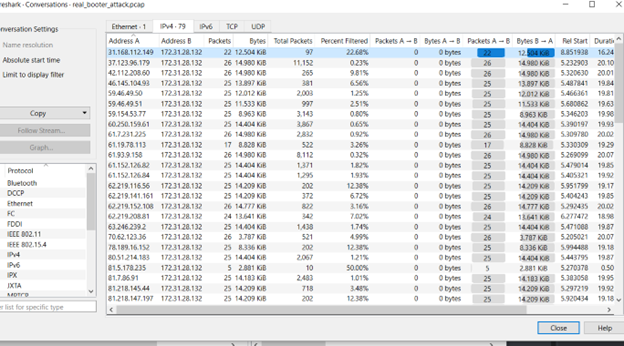

In [36]:
Image(filename='Q5.png')

6) 172.31.28.132

7) 120149

8) There are 79 unique IP addresses

9) 37.123.96.179, 61.93.9.158, 121.32.89.198

10) Turkey, Hong Kong, China

11) SPD-NET, HKBN-AS-AP Hong Kong Broadband Network Ltd., CHINANET-BACKBONE No.31

12) All of the MAC addresses in wireshark show up as the same, since they are the address of the last hop on the packet’s route to the victim (06:90:f4:0e:e0:ff). This means that it is not possible to get the distribution of vendors from the information given to us. When searching up said MAC address, we do not get any results for the Vendor.

13) Source port is 53

14) When plotting the data rate per second of the attack this a figure can be made. From this the CSV file can be gotten, which displays the values for bits/second. In this CSV file the highest value is at 23 seconds with a value of 112.457. This means the data rate peak of the attack is 112.457 Mbits/second.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


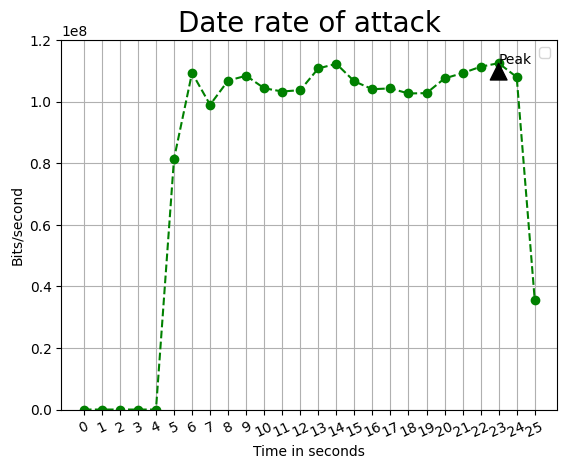

In [35]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
x = []
y = []
 
with open('real_booter_attack_filtered.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[0])
        y.append(float(row[1]))

fig = plt.figure()
ax = fig.add_subplot(111)
ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]

ax.annotate('Peak', xy=(xmax, ymax), xytext=(xmax, ymax+5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot(x, y, color = 'g', linestyle = 'dashed',
         marker = 'o')
plt.xticks(rotation = 25)
plt.xlabel('Time in seconds')
plt.ylabel('Bits/second')
plt.title('Date rate of attack', fontsize = 20)
plt.grid()
plt.legend()
ax.set_ylim(0,120000000)
plt.show()

15) There is only 1 packet with the TCP protocol, which uses the RST flag. This packet is sent from the victim to the attacker. This packet is sent to the attacker to close the connection. This is a normal behavior of TCP, which is used to close a connection.

In [37]:
Image(filename='TCP.png')

16)

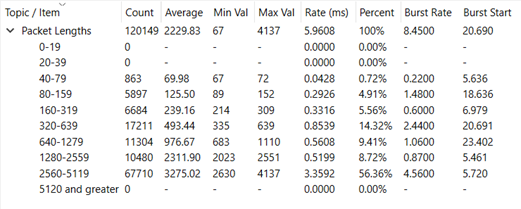

In [39]:
Image(filename='Q16.png')

# Conclusion and Reflections

To conclude this assignment, the following section presents a conclusion regarding our findings, and learnings. 

Overall this assignment went pretty smoothly. Most questions were quite clear. We concluded that the attack that was examined was indeed a DDoS attack. In addition it was found that not all of the IP addresses played a part of the attack. An example of this would be the IP address 172.31.0.2.  

Another important finding is that the attackers were sending DNS responses to the victim. They used a DDoS Amplification attack where they target some routers with DNS query responses, providing the victim’s IP as the source IP, and then the routers send the (much larger) DNS responses to the victim’s IP, resulting in flooding it. 

For this attack it was also found that the total DDoS attack size was around 2.2 Gbit over a period of 20 seconds. 

# Bibliography
[1]	“Wireshark · Go Deep.” https://www.wireshark.org/ (accessed Oct. 11, 2022).

[2]	“Wireshark Q&A.” https://osqa-ask.wireshark.org/questions/34801/how-can-i-identify-a-ddosdos-attack-with-wireshark/ (accessed Oct. 11, 2022).
